<a href="https://colab.research.google.com/github/sheikhi-a/Big-data-with-Python/blob/main/Dynamic_python_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np


data =  pd.read_csv('https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv')
#data =  pd.read_csv('gapdata.csv')
data['continent'] = pd.Categorical(data['continent'])
data.head()
data.tail()
data.describe()
data.dtypes
data.shape

#data.shape

(1704, 6)

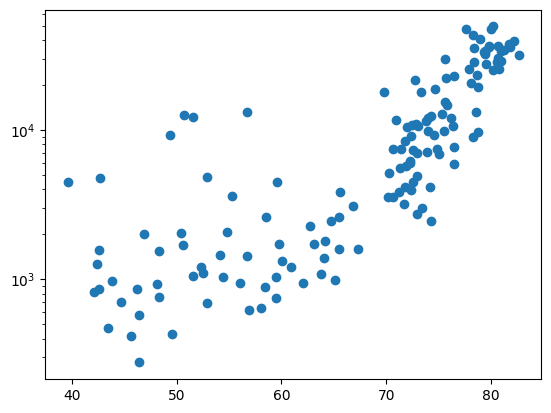

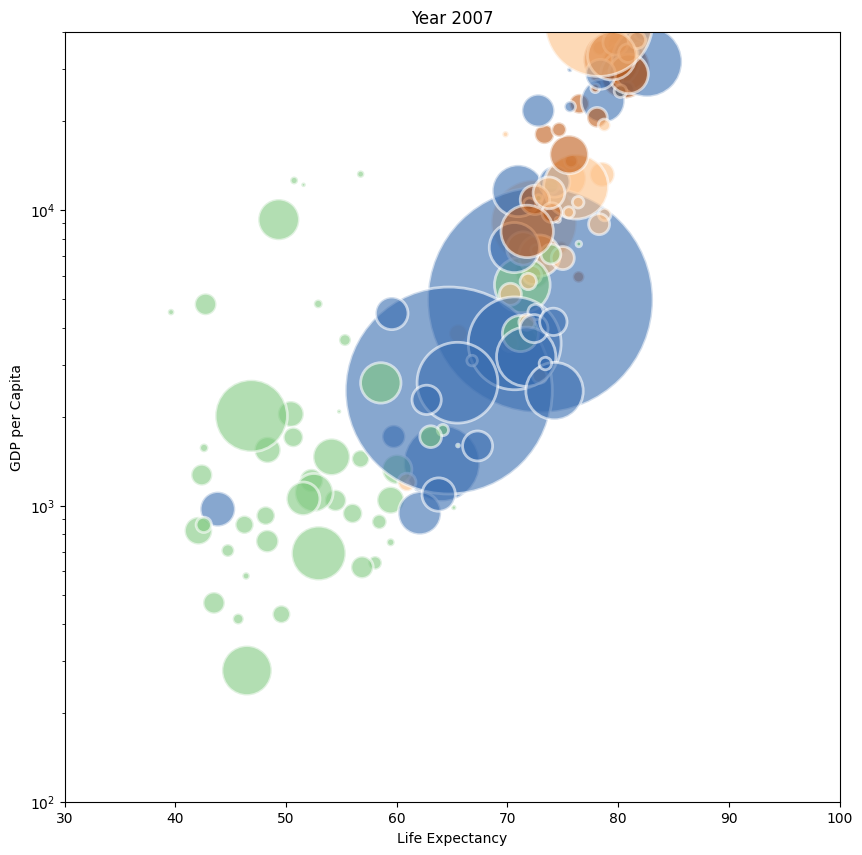

In [ ]:
# provide a static plot
# Subset of the data for year 1952
data1952 = data[data.year == 2007]
data1952.shape

plt.scatter(
    x = data1952['lifeExp'],
    y = data1952['gdpPercap'])
plt.yscale('log')
plt.show()

# Scatterplot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    x = data1952['lifeExp'],
    y = data1952['gdpPercap'],
    s = data1952['pop']/50000,
    c = data1952['continent'].cat.codes,
    cmap = "Accent",
    alpha = 0.6,
    edgecolors = "white",
    linewidth = 2
)

plt.yscale('log')
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("GDP per Capita")
ax.set_title("Year 2007")
ax.set_ylim(100,40000)
ax.set_xlim(30, 100)

plt.show()

In [ ]:
data['country'] = data['country'].astype('category')
data.dtypes

,0
country,category
year,int64
pop,float64
continent,category
lifeExp,float64
gdpPercap,float64


(30.0, 100.0)

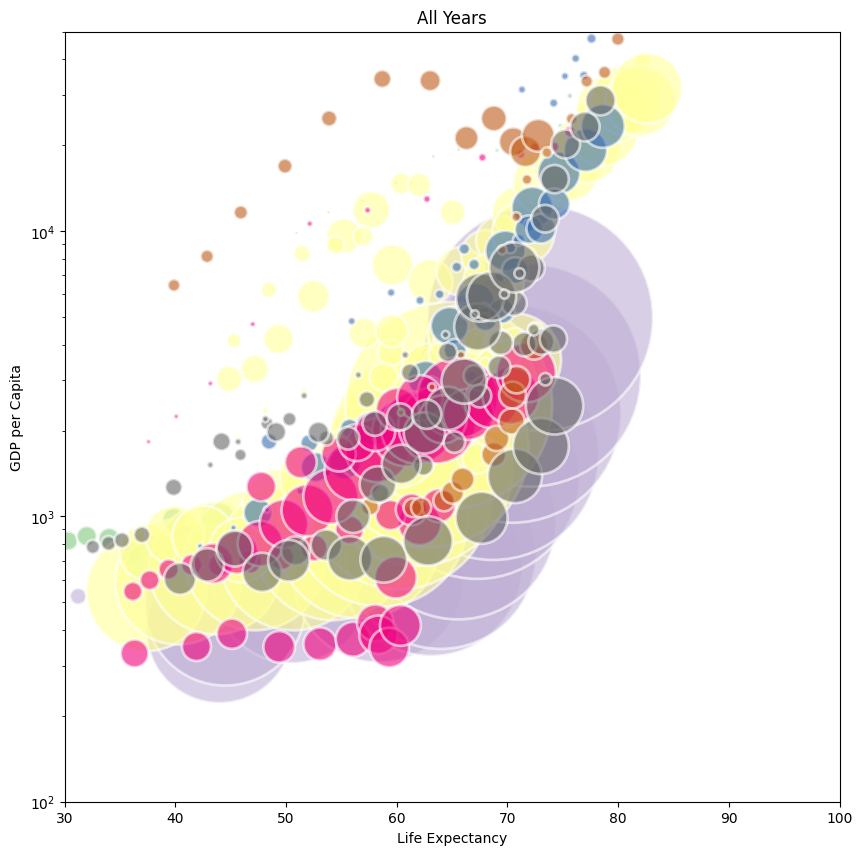

In [ ]:

from matplotlib.colors import ListedColormap
data1 = data[data.continent=='Asia']
data1.shape
data1['continent'] = pd.Categorical(data1['continent'])

print(data1.head())

data1.tail()

print(data1.to_markdown())

data1.shape


fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(
    x = data1['lifeExp'],
    y = data1['gdpPercap'],
    s = data1['pop']/50000,
    c = data1['country'].cat.codes,
    cmap = "Accent",
    alpha = 0.6,
    edgecolors = "white",
    linewidth = 2
)

# Add titles (main and on axis)
plt.yscale('log')
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("GDP per Capita")
ax.set_title("All Years")
ax.set_ylim(100,50000)
ax.set_xlim(30, 100)

# Add a colorbar to show the mapping of colors to countries
#plt.colorbar(scatter, label='country', ticks=range(len(data1['country'].cat.categories)),
#             boundaries=np.arange(len(data1['country'].cat.categories) + 1) - 0.5)
plt.show()

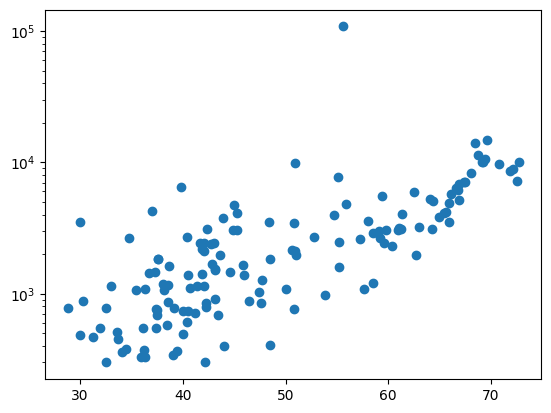

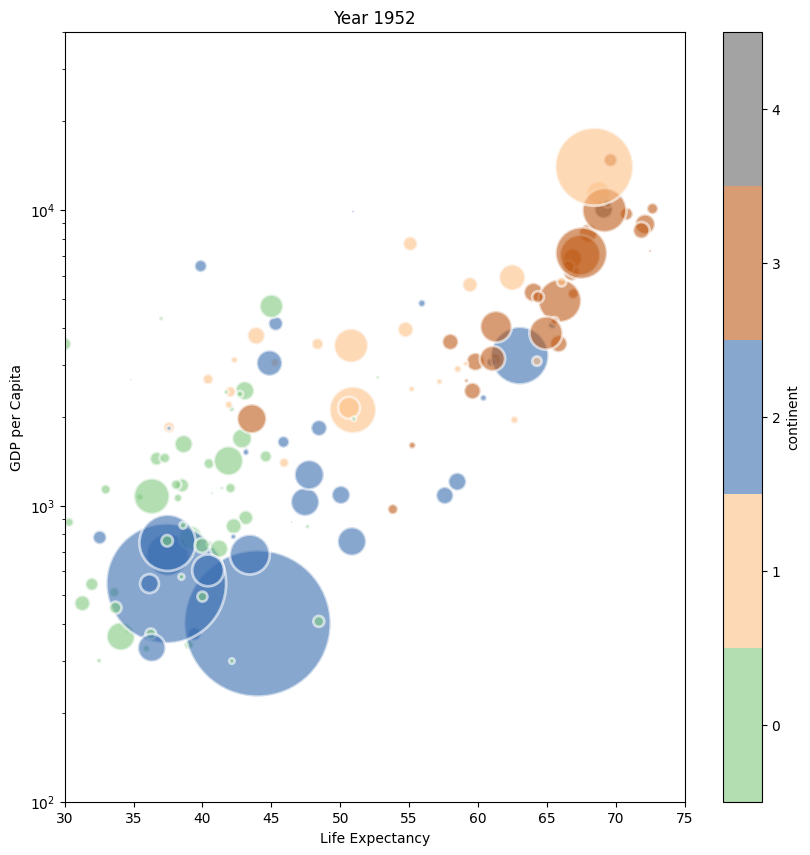

In [ ]:


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np


data =  pd.read_csv('https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv')
#data =  pd.read_csv('gapdata.csv')
data['continent'] = pd.Categorical(data['continent'])
data.head()
data.describe()
data.dtypes

#data.shape
# provide a static plot
# Subset of the data for year 1952
data1952 = data[data.year == 1952]

plt.scatter(
    x = data1952['lifeExp'],
    y = data1952['gdpPercap'])
plt.yscale('log')
plt.show()
data1952.continent.value_counts()
# Scatterplot
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(
    x = data1952['lifeExp'],
    y = data1952['gdpPercap'],
    s = data1952['pop']/50000,
    c = data1952['continent'].cat.codes,
    cmap = "Accent",
    alpha = 0.6,
    edgecolors = "white",
    linewidth = 2
)

# Add titles (main and on axis)
plt.yscale('log')
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("GDP per Capita")
ax.set_title("Year 1952")
ax.set_ylim(100,40000)
ax.set_xlim(30, 75)

# Add a colorbar to show the mapping of colors to continents
plt.colorbar(scatter, label='continent', ticks=range(len(data1952['continent'].cat.categories)),
             boundaries=np.arange(len(data1952['continent'].cat.categories) + 1) - 0.5)
plt.show()



In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=120)
data.head()
def update(frame):
    # Clear the current plot to redraw
    ax.clear()

    # Filter data for the specific year
    yearly_data = data.loc[data.year == frame, :]

    # Scatter plot for that year
    ax.scatter(
        x=yearly_data['lifeExp'],
        y=yearly_data['gdpPercap'],
        s=yearly_data['pop']/100000,
        c=yearly_data['continent'].cat.codes,
        cmap="Accent",
        alpha=0.6,
        edgecolors="white",
        linewidths=2
    )

    # Updating titles and layout
    ax.set_title(f"Global Development in {frame}")
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("GDP per Capita")
    ax.set_yscale('log')
    ax.set_ylim(100, 100000)
    ax.set_xlim(20, 90)

    return ax

ani = FuncAnimation(fig, update, frames=data['year'].unique())
#ani.save('/Users/macbook/Work/book/Big Data/codes/gapminder-1.gif', fps=3)
ani.save('gapminder-1.gif', fps=3)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
#make more smooth using interpolation points
interp_data = pd.DataFrame()

multiple = 10
for country in data['country'].unique():

   temp_df = pd.DataFrame()
   country_df = data[data['country']==country]

   # interpolate the data
   years = np.linspace(country_df['year'].min(), country_df['year'].max(), len(country_df) * multiple-(multiple-1))
   pops = np.linspace(country_df['pop'].min(), country_df['pop'].max(), len(country_df) * multiple-(multiple-1))
   lifeExps = np.linspace(country_df['lifeExp'].min(), country_df['lifeExp'].max(), len(country_df) * multiple-(multiple-1))
   gdps = np.linspace(country_df['gdpPercap'].min(), country_df['gdpPercap'].max(), len(country_df) * multiple-(multiple-1))
   continents = [country_df['continent'].values[0]] * len(years)

   temp_df['year'] = years
   temp_df['pop'] = pops
   temp_df['lifeExp'] = lifeExps
   temp_df['gdpPercap'] = gdps
   temp_df['continent'] = continents
   temp_df['country'] = country

   interp_data = pd.concat([interp_data, temp_df])
   interp_data['continent'] = pd.Categorical(interp_data['continent'])

interp_data.head()

,year,pop,lifeExp,gdpPercap,continent,country
0,1952.0,8.425333e+06,28.801000,635.341351,Asia,Afghanistan
1,1952.5,8.638647e+06,28.937609,638.456534,Asia,Afghanistan
2,1953.0,8.851962e+06,29.074218,641.571716,Asia,Afghanistan
3,1953.5,9.065276e+06,29.210827,644.686899,Asia,Afghanistan
4,1954.0,9.278591e+06,29.347436,647.802081,Asia,Afghanistan


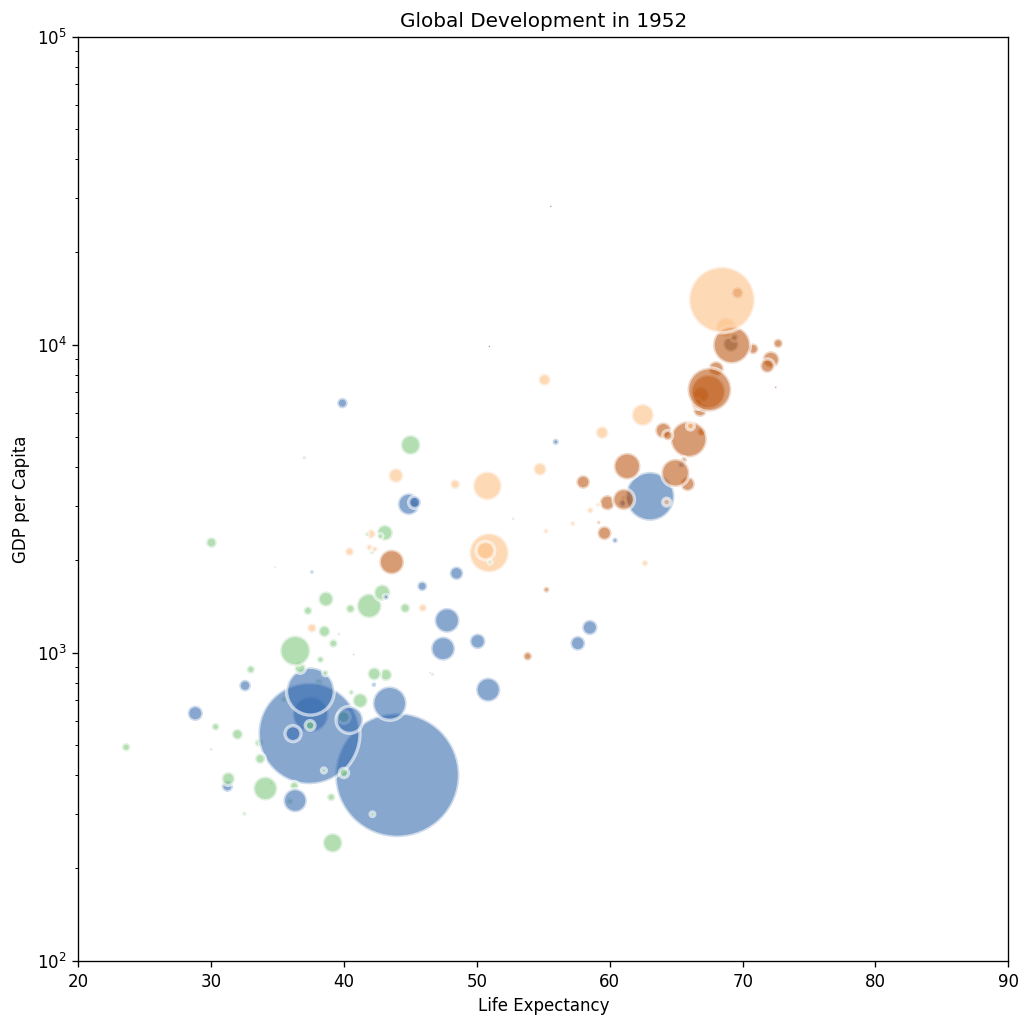

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=120)

def update(frame):
    # Clear the current plot to redraw
    ax.clear()

    # Filter data for the specific year
    yearly_data = interp_data.loc[interp_data.year == frame, :]

    # Scatter plot for that year
    ax.scatter(
        x=yearly_data['lifeExp'],
        y=yearly_data['gdpPercap'],
        s=yearly_data['pop']/100000,
        c=yearly_data['continent'].cat.codes,
        cmap="Accent",
        alpha=0.6,
        edgecolors="white",
        linewidths=2
    )

    # Updating titles and layout
    ax.set_title(f"Global Development in {round(frame)}")
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("GDP per Capita")
    ax.set_yscale('log')
    ax.set_ylim(100, 100000)
    ax.set_xlim(20, 90)

    return ax

ani = FuncAnimation(fig, update, frames=interp_data['year'].unique())
ani.save('gapminder-2.gif', fps=10)

<ipython-input-36-24ea9694c322>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  continent_life_exp = yearly_data.groupby('continent')['lifeExp'].mean()


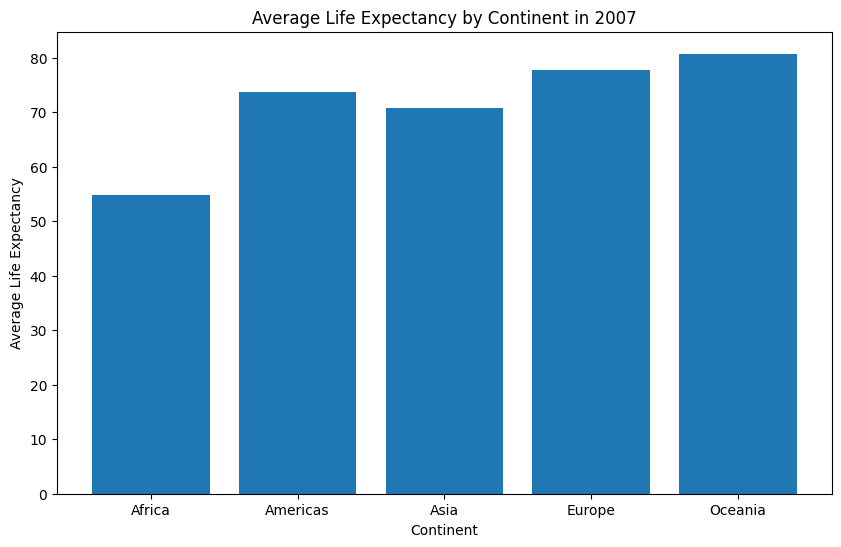

In [ ]:
#  animated bar chart

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))
bar_plot = ax.bar([], [])

def update(frame):
    yearly_data = data[data.year == frame]
    continent_life_exp = yearly_data.groupby('continent')['lifeExp'].mean()
    ax.clear()
    bar_plot = ax.bar(continent_life_exp.index, continent_life_exp.values)
    ax.set_xlabel('Continent')
    ax.set_ylabel('Average Life Expectancy')
    ax.set_title(f'Average Life Expectancy by Continent in {frame}')
    return bar_plot

ani = FuncAnimation(fig, update, frames=data['year'].unique())

ani.save('animated_bar_chart.gif', fps=5)

plt.show()


##you may draw gor gdp and another funcyion such as var()

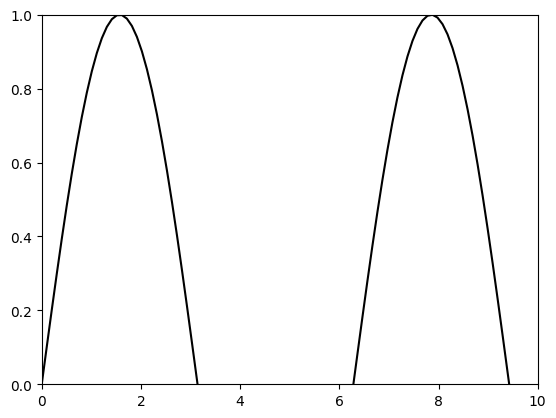

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
ani.save('sin.gif')
plt.show()











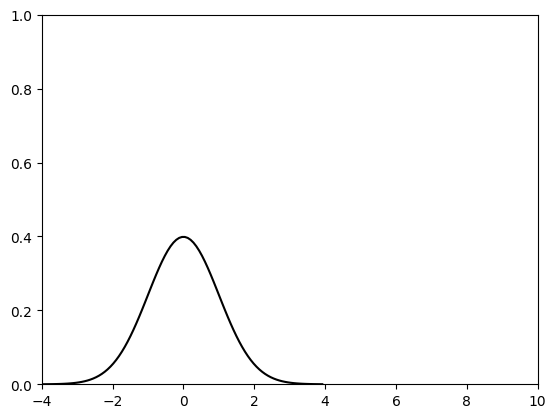

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

x = np.linspace(-4, 4, 100)
y = norm.pdf(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([-4, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
ani.save('test.gif')
plt.show()

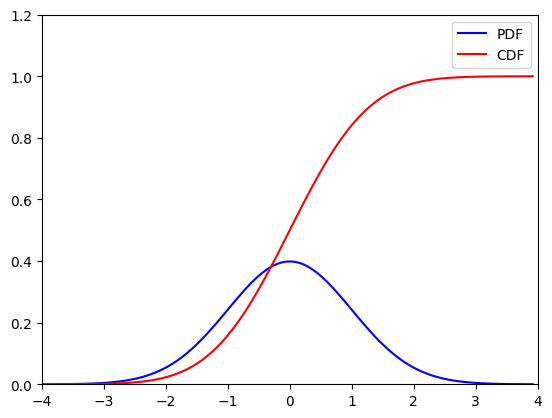

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.stats import norm

x = np.linspace(-4, 4, 100)

fig, ax = plt.subplots()

line_pdf, = ax.plot([], [], color='blue', label='PDF')
line_cdf, = ax.plot([], [], color='red', label='CDF')

ax.set_xlim([x.min(), x.max()])
ax.set_ylim([0, 1.2])  # Adjust ylim based on your data

ax.legend()

def update(frame):
    y_pdf = norm.pdf(x[:frame])
    y_cdf = norm.cdf(x[:frame])

    line_pdf.set_data(x[:frame], y_pdf)
    line_cdf.set_data(x[:frame], y_cdf)

    return line_pdf, line_cdf

ani = FuncAnimation(fig, update, frames=len(x), interval=50, blit=True)

ani.save('animated_normal_pdf_cdf.gif', writer='pillow')

plt.show()

In [ ]:

# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D


# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
data.shape
data.head()
data.tail()
data.columns

# Transform it to a long format
df = data.unstack().reset_index()
df.tail(10)
df.shape
df.columns = ["X", "Y", "Z"]

df.X.value_counts()

# Transform the old column name in something numeric
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
trisurf = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# Set the angle of the camera
ax.view_init(10, 40)

# Add color bar which maps values to colors
fig.colorbar(trisurf, ax=ax, shrink=0.5, aspect=5)


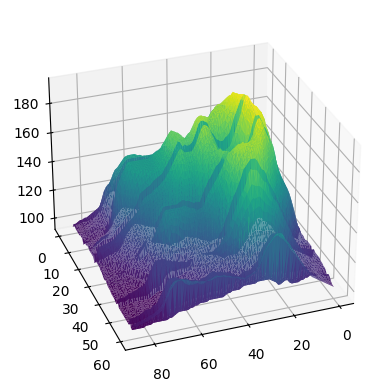

In [41]:
# Import necessary libraries
from matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df = data.unstack().reset_index()
df.columns = ["X", "Y", "Z"]

# Transform the old column name in something numeric
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

def update(frame):
    ax.clear()
    trisurf = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.view_init(30, 70+frame)
    return fig,

ani = FuncAnimation(fig, update, frames=range(0, 180))
ani.save('volcano.gif', fps=30)